# Dataset Cleanup Process
____

#### 1. Import Libraries
_____

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sqlalchemy import create_engine

#### 2. Load Dataset
_____

In [2]:
df = pd.read_excel('../../data/commercial_data (Alex).xlsx',sheet_name='building')

df.head(5)

,type1,type2,ptype,floor_area,build_year,occupy,star,site_eui,fuel1,fuel2,fuel3,fuel4,diesel,steam,ngas,water_use
0,Office,Office,NaN,293447.0,1963,100,NaN,305.6,NaN,NaN,NaN,NaN,NaN,51550675.1,NaN,NaN
1,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),NaN,3889181.0,1969,100,55.0,229.8,NaN,19624847.2,NaN,NaN,NaN,-391414802.6,933073441.0,NaN
2,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),NaN,231342.0,1924,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),NaN,1305748.0,1971,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),NaN,179694.0,1932,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3. Check for missing data
____

In [3]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 16 columns):
type1         11746 non-null object
type2         11744 non-null object
ptype         1 non-null object
floor_area    11744 non-null float64
build_year    11746 non-null int64
occupy        11746 non-null int64
star          9642 non-null float64
site_eui      11583 non-null float64
fuel1         9 non-null float64
fuel2         2581 non-null float64
fuel3         1321 non-null float64
fuel4         594 non-null float64
diesel        16 non-null float64
steam         936 non-null float64
ngas          10304 non-null float64
water_use     7762 non-null float64
dtypes: float64(11), int64(2), object(3)
memory usage: 1.4+ MB


In [4]:
result = []

for col in df.columns:
    result.append({
        'column_name'    : col,
        'total_null'     : df[col].isna().sum(),
        'total_non_null' : df[col].count(),
        'perc_null'      : (df[col].isna().sum() / df.shape[0]),
        'perc_not_null'  : (df[col].count() / df.shape[0])
    })
    
pd.DataFrame(data=result, columns=['column_name', 'total_null', 'total_non_null', 'perc_null', 'perc_not_null'])

,column_name,total_null,total_non_null,perc_null,perc_not_null
0,type1,0,11746,0.000000,1.000000
1,type2,2,11744,0.000170,0.999830
2,ptype,11745,1,0.999915,0.000085
3,floor_area,2,11744,0.000170,0.999830
4,build_year,0,11746,0.000000,1.000000
5,occupy,0,11746,0.000000,1.000000
6,star,2104,9642,0.179125,0.820875
7,site_eui,163,11583,0.013877,0.986123
8,fuel1,11737,9,0.999234,0.000766
9,fuel2,9165,2581,0.780266,0.219734


#### 4. Plot Null Mapping
___

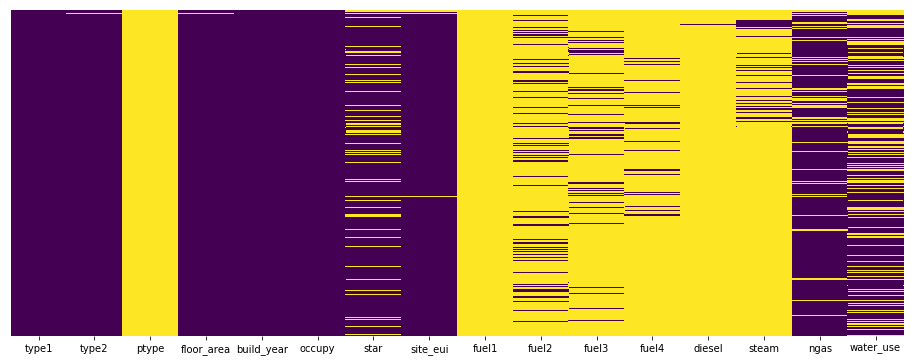

In [5]:
plt.figure(figsize=(16,6))

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

#### 5. Fix type1 / type2 columns => replacing by ptype column
___

In [6]:
def get_type(row):    
    columns = ['type1', 'type2']
    category = 'other'

    try:
        for col in columns:
            if not category in row[col].lower():
                return row[col]
    except:
        return 'Other'
    
    return 'Other'

df['ptype'] = df.apply(get_type, axis=1)

df.drop(['type1', 'type2'],axis='columns', inplace=True)

#### 6. Fix NaN  values for star, site_eui and floor_area columns using average strategy
___

In [16]:
#df['star'].fillna(df['star'].mean(), inplace=True)

#df.dropna(subset=df['site_eui'], axis='columns', inplace=True)
#df['site_eui'].fillna(df['site_eui'].mean(), inplace=True)

#df['floor_area'].fillna(df['floor_area'].mean(), inplace=True)
#df['floor_area'].dropna(axis='columns', inplace=True)#


#### 7. Fix fuel1-fuel4 columns => total_fuel
##### **This approach must be revised by Hi Shin**
+ Combine fuel1, fuel2, fuel3 and fuel4 into a single field (total_fuel)
+ Average the NaN values remainders
+ Need to find a way to evaluate if averaging is a better approach rather than droping the columns
___

In [7]:
#def get_fuel(row):
#    columns = ['fuel1', 'fuel2', 'fuel3', 'fuel4']
#    
#    #try:
#    for col in columns:
#        if not pd.isna(row[col]):
#            return row[col]
#    return np.nan

#df['total_fuel'] = df.apply(get_fuel, axis=1)
df.drop(['fuel1', 'fuel2', 'fuel3', 'fuel4'],axis='columns', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 10 columns):
ptype         11746 non-null object
floor_area    11744 non-null float64
build_year    11746 non-null int64
occupy        11746 non-null int64
star          9642 non-null float64
site_eui      11583 non-null float64
diesel        16 non-null float64
steam         936 non-null float64
ngas          10304 non-null float64
water_use     7762 non-null float64
dtypes: float64(7), int64(2), object(1)
memory usage: 917.7+ KB


In [206]:
# 4143 / 11746 = 0.3527158181508599

#df['total_fuel'].fillna(df['total_fuel'].mean(), inplace=True)

#### 8. Droping columns diesel and steam (NaN values > 70%)
___

In [8]:
df.drop(['diesel', 'steam'],axis='columns', inplace=True)

#### 9. Fix NaN values for ngas and water_use columns using average strategy
##### **This approach must be revised by Hi Shin**
___

In [9]:
columns = ['ngas', 'water_use']

for index, row in df[columns].iterrows():
    if not pd.isna(row['ngas']) and not pd.isna(row['water_use']):
        pass
    else:
        row['ngas'] = np.nan
        row['water_use'] = np.nan


#### 10. Drop NaN
___

In [10]:
df.dropna(axis='columns', how='all', inplace=True)
df.dropna(inplace=True)

#### 11. Plot Null Mapping Again
___

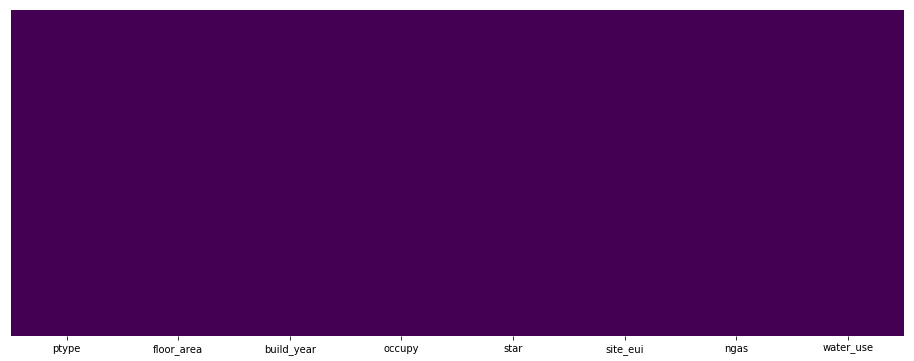

In [11]:
plt.figure(figsize=(16,6))

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [12]:
result = []

for col in df.columns:
    result.append({
        'column_name'    : col,
        'total_null'     : df[col].isna().sum(),
        'total_non_null' : df[col].count(),
        'perc_null'      : (df[col].isna().sum() / df.shape[0]),
        'perc_not_null'  : (df[col].count() / df.shape[0])
    })
    
pd.DataFrame(data=result, columns=['column_name', 'total_null', 'total_non_null', 'perc_null', 'perc_not_null'])

,column_name,total_null,total_non_null,perc_null,perc_not_null
0,ptype,0,5900,0.0,1.0
1,floor_area,0,5900,0.0,1.0
2,build_year,0,5900,0.0,1.0
3,occupy,0,5900,0.0,1.0
4,star,0,5900,0.0,1.0
5,site_eui,0,5900,0.0,1.0
6,ngas,0,5900,0.0,1.0
7,water_use,0,5900,0.0,1.0


#### 12. Frequency count of the different type of buildings for ptype
___

In [13]:
df['ptype'].value_counts()

Multifamily Housing                      4776
Office                                    550
Hotel                                     147
Non-Refrigerated Warehouse                 86
Senior Care Community                      71
Residence Hall/Dormitory                   55
Distribution Center                        47
Retail Store                               41
K-12 School                                31
Hospital (General Medical & Surgical)      21
College/University                         16
Medical Office                             15
Supermarket/Grocery Store                  12
Mixed Use Property                          8
Wholesale Club/Supercenter                  6
Worship Facility                            5
Refrigerated Warehouse                      4
Financial Office                            4
Courthouse                                  2
Self-Storage Facility                       2
Manufacturing/Industrial Plant              1
Name: ptype, dtype: int64

In [14]:
df.shape

(5900, 8)

#### 13. Export DataFrame to CSV
___

In [15]:
df.to_csv('../../data/commercial_data_clear.csv',index=False)

#### 14. Export DataFrame to SQLite
___

In [16]:
disk_engine = create_engine('sqlite:///../../data/energy.db')
df.to_sql(name='buildings', con=disk_engine, if_exists='replace')